# **Pet Classification Model Using CNN**
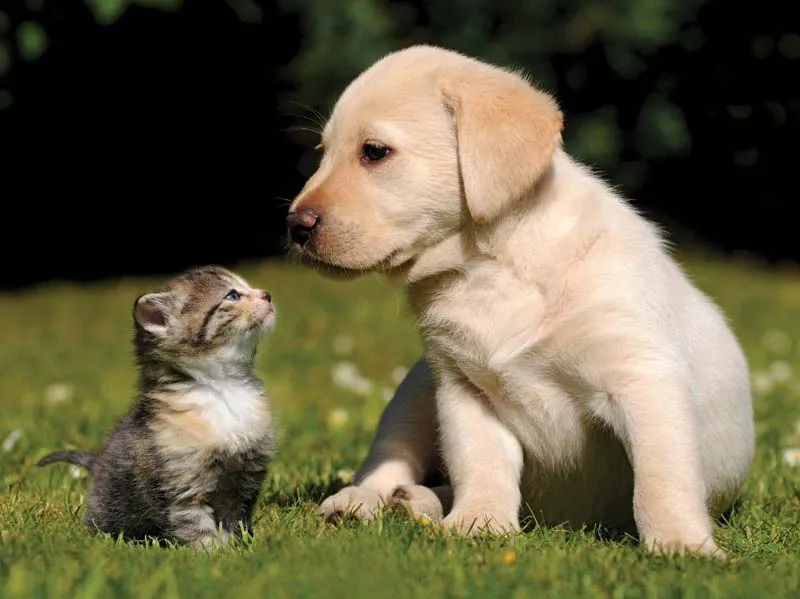


DESCRIPTION

Project Objective:


Build a CNN model that classifies the given pet images correctly into dog and cat images. 
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping. 


Project Description and Scope: 


You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data. 


Project Guidelines:


Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers: 

● Input layer 

● Convolutional layer 1 with 32 filters of kernel size[5,5] 

● Pooling layer 1 with pool size[2,2] and stride 2 

● Convolutional layer 2 with 64 filters of kernel size[5,5] 

● Pooling layer 2 with pool size[2,2] and stride 2 

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 

● Dropout layer with dropout probability 0.4 
Predict the class by doing a softmax on the output of the dropout layers. 

This should be followed by training and evaluation:

● For the training step, define the loss function and minimize it 

● For the evaluation step, calculate the accuracy 
Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 


# ***Importing*** ***Library***

In [1]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import random
import os

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/AI ML Datasets/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

***Data*** ***Generators***

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


***Normalization*** 

In [5]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### ***Create CNN model*** **: 1**

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(5,5),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='softmax'))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 91s 121ms/step - loss: 0.9642 - accuracy: 0.5000 - val_loss: 0.6517 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 73s 116ms/step - loss: 0.6523 - accuracy: 0.5000 - val_loss: 0.6727 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 73s 117ms/step - loss: 0.6430 - accuracy: 0.5000 - val_loss: 0.6353 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 71s 112ms/step - loss: 0.6023 - accuracy: 0.5000 - val_loss: 0.6102 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5761 - accuracy: 0.5000 - val_loss: 0.6152 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5303 - accuracy: 0.5000 - val_loss: 0.5873 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 73s 115ms/step - loss: 0.4854 - accuracy: 0.5000 - val_loss: 0.4568 - val_ac





#####By comparing the results of SOFTMAX and SIGMOID activation function at output layers it's shows drastical results.
*   In SOFTMAX, Accuracy does not cross 50% and Validation accuracy as epochs goes on increasing
*   In SIGMOID, Accuracy is keep on increasing and Validation loss decreasing as number of epochs increasing.


#####So, This is the required output. Therefore we will use SIGMOID in output layer

### ***Create CNN model : 2***

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(5,5),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
625/625 [==============================] - 74s 114ms/step - loss: 0.6957 - accuracy: 0.5839 - val_loss: 0.7090 - val_accuracy: 0.5004
Epoch 2/15
625/625 [==============================] - 71s 113ms/step - loss: 0.6181 - accuracy: 0.6719 - val_loss: 0.7228 - val_accuracy: 0.5278
Epoch 3/15
625/625 [==============================] - 71s 114ms/step - loss: 0.5720 - accuracy: 0.7189 - val_loss: 0.5910 - val_accuracy: 0.6858
Epoch 4/15
625/625 [==============================] - 74s 117ms/step - loss: 0.5217 - accuracy: 0.7538 - val_loss: 0.5628 - val_accuracy: 0.7084
Epoch 5/15
625/625 [==============================] - 72s 114ms/step - loss: 0.4659 - accuracy: 0.7908 - val_loss: 0.5362 - val_accuracy: 0.7404
Epoch 6/15
625/625 [==============================] - 72s 114ms/step - loss: 0.4171 - accuracy: 0.8177 - val_loss: 0.5442 - val_accuracy: 0.7426
Epoch 7/15
625/625 [==============================] - 71s 113ms/step - loss: 0.3366 - accuracy: 0.8602 - val_loss: 0.5452 - val_ac

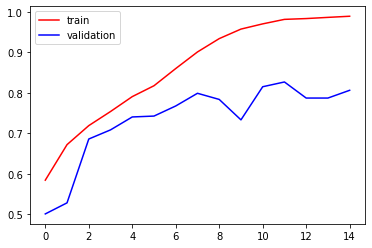

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

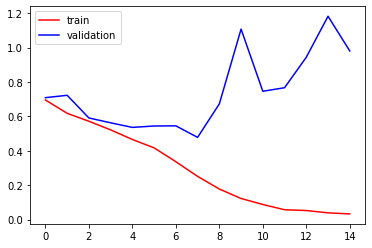

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

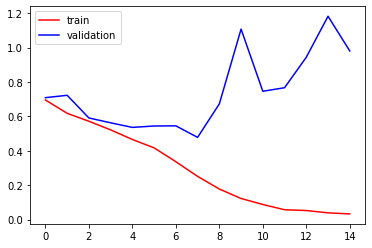

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

*   After plotting the graph for accuracy its showing the big gap betwwen training and test dataset acuuracy.
*   That means our model is overfitted to data so, we will reduce the overfitting by following methods




In [30]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

#Here, we had Used Batch Normalization and Dropout for Rewduce the overfitting 

# ***Predictions***

In [16]:
import cv2

In [17]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10000.jpg')

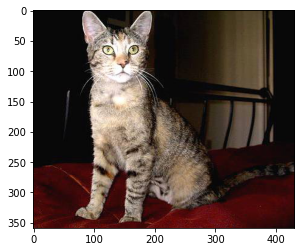

In [18]:
#Input Image for Layer visualization
img1 = image.load_img('/content/dogs_vs_cats/test/cats/cat.10000.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('//content/dogs_vs_cats/test/cats/cat.10000.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

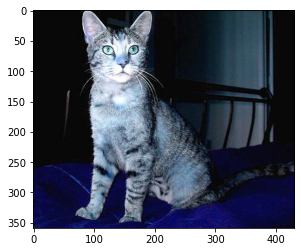

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(359, 431, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
predict = model.predict(test_input)
predict= predict > 0.5

if (predict ==0):
  predict = "DOG"
else:
  predict = "CAT"

print("Our model says it is a :", predict)

1/1 [==============================] - 0s 36ms/step
Our model says it is a : CAT
